##### Create a training pipeline

In [6]:
from sklearn.datasets import samples_generator

In [3]:
from sklearn.feature_selection import SelectKBest, f_regression
#f_regression - identifies which K features to select from given number of features

In [4]:
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
#generate Data
X,y = samples_generator.make_classification(n_samples=150, n_features=25, n_classes=3, random_state=7, n_informative=6)

In [12]:
X.shape

(150, 25)

In [14]:
k_base_selector = SelectKBest(f_regression, k =9 )

In [16]:
classifier = ExtraTreesClassifier(n_estimators=50, max_depth=4)

In [17]:
##### Pipeline Creation

In [18]:
processor_pipeline = Pipeline([('selector',k_base_selector),('erf',classifier) ])

In [19]:
processor_pipeline.set_params(selector__k=7, erf__n_estimators=30)

Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=7, score_func=<function f_regression at 0x0000015262070950>)), ('erf', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_spl...timators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [21]:
processor_pipeline.fit(X,y)

Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=7, score_func=<function f_regression at 0x0000015262070950>)), ('erf', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_spl...timators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [23]:
output = processor_pipeline.predict(X)

In [24]:
processor_pipeline.score(X,y)

0.85999999999999999

In [26]:
status = processor_pipeline.named_steps['selector'].get_support()

In [27]:
#list comprehension
selected = [i for i,x in enumerate(status) if x]

In [28]:
selected

[1, 4, 6, 15, 16, 20, 21]

#### Extract nearest neighbors

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from sklearn.neighbors import NearestNeighbors

In [32]:
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9],  
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9], 
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]]) 

In [33]:
k = 5

In [34]:
test_datapoint = [4.3, 2.7]

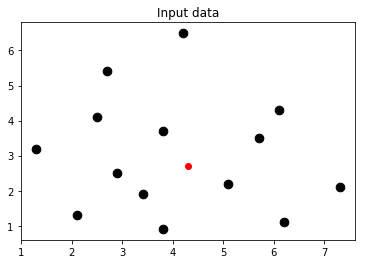

In [39]:
# Plot input data  
plt.figure() 
plt.title('Input data') 
plt.scatter(X[:,0], X[:,1], marker='o', s=75, color='black') 
plt.plot([4.3],[2.7],'ro')

In [36]:
knn_model = NearestNeighbors(n_neighbors=k).fit(X)

In [38]:
knn_model.kneighbors([test_datapoint])

(array([[ 0.94339811,  1.11803399,  1.20415946,  1.41421356,  1.61245155]]),
 array([[12,  7,  9,  2, 10]], dtype=int64))

In [40]:
X[12]

array([ 5.1,  2.2])

In [41]:
X[7]

array([ 3.8,  3.7])

In [42]:
import pandas as pd

In [45]:
house_data = pd.read_csv('house_rental_data.csv',index_col='Unnamed: 0')

In [46]:
knn_model = NearestNeighbors(n_neighbors=k).fit(house_data)

In [51]:
knn_model.kneighbors(house_data[1:2])

(array([[  0.   ,   0.   ,  81.834,  81.834,  81.834]]),
 array([[358,   1, 442, 402, 460]], dtype=int64))

In [48]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [52]:
house_data[1:2]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
2,2134.8,5,7,4,2,2,78000


In [53]:
house_data[358:359]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
362,2134.8,5,7,4,2,2,78000


In [54]:
house_data[442:443]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
446,2052.966,5,7,4,2,2,78000


In [55]:
#### Using knn classifier

In [58]:
data = pd.read_csv('data.csv.txt',header=None)

In [62]:
X = data[[0,1]]

In [63]:
y = data[2]

In [64]:
num_neighbors = 12

In [65]:
from sklearn import neighbors

In [66]:
classifier = neighbors.KNeighborsClassifier(num_neighbors)

In [67]:
classifier.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [68]:
classifier.predict(X)

array([0, 1, 3, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 2, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 1, 1, 2, 3, 0, 1, 2, 3, 0, 1, 1, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3], d

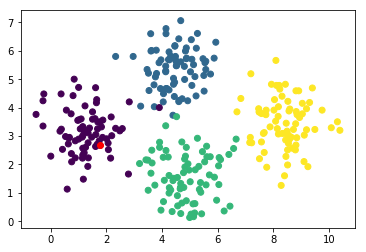

In [75]:
#Convert dataframe to numpy array using matrix
d = data.as_matrix()
plt.scatter(d[:,0], d[:,1], c= d[:,2])
plt.plot(1.77,2.67,'ro')
#d[:,0].shape

In [78]:
_, pts = classifier.kneighbors([[2.3,2]])

In [79]:
pts

array([[ 56, 220, 176, 184,   0,  54, 116,  48,  80,  76,  36, 168]], dtype=int64)

In [82]:
pts[0]

array([ 56, 220, 176, 184,   0,  54, 116,  48,  80,  76,  36, 168], dtype=int64)

In [84]:
data.loc[pts[0]]

,0,1,2
56,2.15,2.22,0
220,2.07,2.52,0
176,2.79,1.66,0
184,2.06,2.75,0
0,1.77,2.67,0
54,3.19,2.03,2
116,1.61,2.63,0
48,2.01,2.90,0
80,1.67,2.71,0
76,1.33,1.93,0
